#### Download the dataset from Hugging face

In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("AmaanP314/youtube-comment-sentiment")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.93k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


youtube-comments-sentiment.csv:   0%|          | 0.00/296M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1032225 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['CommentID', 'VideoID', 'VideoTitle', 'AuthorName', 'AuthorChannelID', 'CommentText', 'Sentiment', 'Likes', 'Replies', 'PublishedAt', 'CountryCode', 'CategoryID'],
        num_rows: 1032225
    })
})

In [ ]:
df = ds['train'].to_pandas()

In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
Negative,346075
Positive,343317
Neutral,342833


In [ ]:
df.sample(3)

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID
422923,UgyEUDW2vQw5uafx-yl4AaABAg_aug,QpZ-vl05FGA,Racer discovers tires swapped before the race....,AugmentedUser,AugmentedCID,"Off-road rain tires? That's a new one for me, ...",Negative,0,0,2025-02-04 02:26:27,CA,17
674212,UgzWPDhxKmDqZD9lWAB4AaABAg,0OzVc1s3nuo,I Love Dancing With You Guys!! 😆🫶🏻💖 @mayandgia...,@Terry_343,UCdambgou4hVN-gabw03Or-w,Aww,Positive,0,0,2025-01-12 04:08:35,GB,26
246962,Ugw-1b4e8Hs2tV5lpnN4AaABAg,RGKi6LSPDLU,React Tutorial in Hindi 🔥🔥,@umeradil6295,UCdMHDHzS58exbvnT1vEw9Hg,"Hi. Sir Harry, I am your student from Pakistan...",Neutral,0,0,2025-01-16 09:24:35,IN,27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032225 entries, 0 to 1032224
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   CommentID        1032225 non-null  object
 1   VideoID          1032225 non-null  object
 2   VideoTitle       1032225 non-null  object
 3   AuthorName       1031594 non-null  object
 4   AuthorChannelID  1032225 non-null  object
 5   CommentText      1032225 non-null  object
 6   Sentiment        1032225 non-null  object
 7   Likes            1032225 non-null  int64 
 8   Replies          1032225 non-null  int64 
 9   PublishedAt      1032225 non-null  object
 10  CountryCode      1032225 non-null  object
 11  CategoryID       1032225 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 94.5+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df.duplicated()]

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID


In [ ]:
df.drop_duplicates(inplace=True)

#### 1.CommentID

In [ ]:
df['CommentID'].value_counts(ascending=False)

,count
CommentID,
UgzHIjNWIbtDqjgcuup4AaABAg,2
UgwKVk0az41fLMRx7Td4AaABAg,2
UgyJXQMp0s7icE4o3iN4AaABAg,2
UgzKGIcKc5mTDtFlR794AaABAg,2
UgwJ3K-3MIGf4Y6eNwx4AaABAg,2
...,...
UgwAvcFTvB2Fk9FODrV4AaABAg,1
UgzS_pLYsp6lBSWKbg94AaABAg,1
UgyXEqQFwXH7PG-Kzth4AaABAg,1


In [ ]:
# not very useful
df.drop('CommentID',axis=1,inplace=True)

#### 2.VideoID

In [ ]:
df['VideoURL'] = "https://www.youtube.com/watch?v=" + df['VideoID']


In [ ]:
df.drop('VideoID',axis=1,inplace=True)

In [ ]:
df['VideoURL'].value_counts(ascending=False)

,count
VideoURL,
https://www.youtube.com/watch?v=0gASceRnltg,1192
https://www.youtube.com/watch?v=Lzccd-ol1Ks,1177
https://www.youtube.com/watch?v=-hV6aeyPHPA,1151
https://www.youtube.com/watch?v=JarGs7pGbt8,1090
https://www.youtube.com/watch?v=B4pc-6ZKBjg,1003
...,...
https://www.youtube.com/watch?v=T5Vo50IT9hc,5
https://www.youtube.com/watch?v=n-HVPGEDWwo,3
https://www.youtube.com/watch?v=zcCYuF9lQUM,3


In [ ]:
df.columns

Index(['VideoTitle', 'AuthorName', 'AuthorChannelID', 'CommentText',
       'Sentiment', 'Likes', 'Replies', 'PublishedAt', 'CountryCode',
       'CategoryID', 'VideoURL'],
      dtype='object')

#### 3.VideoTitle'

In [ ]:
df['VideoTitle'].value_counts()

,count
VideoTitle,
Whale Vomit Is Worth Millions 😳,1192
A man saved a mountain lion and raise it with love,1177
After a new engine her car dies on her way home makes me think the worst! 😱#fyp #mobile #love #help,1151
Others wall running vs this man (Credit to Storror),1090
Trump: 'All hell will break out' if hostages aren't returned,1003
...,...
Indian Army introduces new 'soldiers',5
FINAL DECISIONS 🙌 | FPL DEADLINE STREAM GAMEWEEK 21 | Fantasy Premier League Tips 2024/25,3
GDPR: What it means and compliance,3


In [ ]:
df['AuthorName']

,AuthorName
0,@OneWhoWandered
1,@chiefvon3068
2,@Abdulla-ip8qr
3,@finnianthehuman
4,@ryoutubeplaylistb6137
...,...
1032220,@lelandconn
1032221,AugmentedUser
1032222,@vincentbergeron518
1032223,@katastrophe5039


In [ ]:
df.columns

Index(['VideoTitle', 'AuthorName', 'AuthorChannelID', 'CommentText',
       'Sentiment', 'Likes', 'Replies', 'PublishedAt', 'CountryCode',
       'CategoryID', 'VideoURL'],
      dtype='object')

#### 4.AuthorChannelID

In [ ]:
df['AuthorChannelID'].value_counts()

,count
AuthorChannelID,
AugmentedCID,151044
UC0T6MVd3wQDB5ICAe45OxaQ,132
UC2Ydj3wdMlU0yUUq0K80Hcw,111
UCIL_daIsxt77TiDUkdGMc1Q,103
UCIveFvW-ARp_B_RckhweNJw,85
...,...
UCRa3PHs5vP7s6Ov0GVg8CtQ,1
UCYW5IQH_F8iLqxXyF9GFoFQ,1
UC4sJmHbbL6rDxazCNlc6AVg,1


In [ ]:
df.drop('AuthorChannelID',axis=1,inplace=True)

In [ ]:
df.columns

Index(['VideoTitle', 'AuthorName', 'CommentText', 'Sentiment', 'Likes',
       'Replies', 'PublishedAt', 'CountryCode', 'CategoryID', 'VideoURL'],
      dtype='object')

In [ ]:
df.drop(columns=['Likes','Replies', 'PublishedAt'], inplace=True)

#### 5.CountryCode

In [ ]:
df['CountryCode'].value_counts(1)*100

,proportion
CountryCode,
US,31.123834
AU,13.671341
GB,12.631161
IN,11.746082
CA,11.419991
IE,7.157742
NZ,6.943060
DE,3.647267
PH,1.659522


#### 6.CategoryID

In [ ]:
df['CategoryID'].value_counts()

,count
CategoryID,
25,332543
27,290237
26,85502
17,69322
15,49635
24,48406
28,47887
2,44749
20,32088


In [ ]:
df['CategoryID'].unique()

array([ 1, 17, 27,  2, 28, 25, 15, 20, 26, 22, 24])

### 7.CommentText


    Pre-processing steps
    Remove URLs
    Lowercase (after handling case-sensitive elements)
    Remove newlines (\n, \r)
    Remove mentions/hashtags (@user, #topic)
    Convert emojis to text (retain sentiment meaning)
    Normalize punctuation (except !, ? for sentiment)
    Handle numbers (remove or replace with <NUM>)
    Language detection (on cleaned text)
    Tokenize
    Remove stopwords (language-specific)
    Lemmatization

#### Basic info


In [ ]:
df.sample()['CommentText'].values

array(["Well, if you believe everything else he's lied to you about, and you can't see the doublespeak and lies in this particular promise, then you deserve the government you are about to get."],
      dtype=object)

In [ ]:
df['CommentText'].value_counts()

,count
CommentText,
❤,1169
Thanks,507
Thanks!,502
❤❤❤,455
😂😂😂,423
...,...
Who the hell is drake?,1
Trabalho lindo,1
That was a great watch. Well done.\nGreat performer and definitely a top 10 of all time in any promotion ever,1


In [ ]:
df.isnull().sum()

,0
VideoTitle,0
AuthorName,631
CommentText,0
Sentiment,0
CountryCode,0
CategoryID,0
VideoURL,0


In [ ]:
df[(df['CommentText'].str.strip() == '')]

,VideoTitle,AuthorName,CommentText,Sentiment,CountryCode,CategoryID,VideoURL
4604,Introduction to Linked List in Data Structures...,AugmentedUser,,Neutral,IN,27,https://www.youtube.com/watch?v=TWMCMvfEAv4
5943,Learn Python by Building Five Games - Full Course,AugmentedUser,,Neutral,US,27,https://www.youtube.com/watch?v=XGf2GcyHPhc
9907,Data Structures Easy to Advanced Course - Full...,AugmentedUser,,Neutral,US,27,https://www.youtube.com/watch?v=RBSGKlAvoiM
13480,JavaScript Tutorial for Beginners | Full Cours...,AugmentedUser,,Neutral,IN,27,https://www.youtube.com/watch?v=Kdz9J5vC4_o
23671,Object Oriented Programming (OOP) in C++ Course,AugmentedUser,,Neutral,US,27,https://www.youtube.com/watch?v=wN0x9eZLix4
...,...,...,...,...,...,...,...
984840,Introduction to Data Structures & Algorithms,AugmentedUser,,Neutral,IN,27,https://www.youtube.com/watch?v=5_5oE5lgrhw
986850,Angular - Node - MongoDB & Express (MEAN) Tuto...,AugmentedUser,,Neutral,DE,27,https://www.youtube.com/watch?v=1tRLveSyNz8
1017989,SQL - Complete Course in 3 Hours | SQL One Sho...,AugmentedUser,,Neutral,IN,27,https://www.youtube.com/watch?v=hlGoQC332VM
1020737,Ruby On Rails In 60 Minutes,AugmentedUser,,Neutral,US,27,https://www.youtube.com/watch?v=pPy0GQJLZUM


In [ ]:
df = df[~(df['CommentText'].str.strip() == '')]

In [ ]:
df['CommentText'] = df['CommentText'].str.lower()

In [ ]:
df['CommentText'] .sample(4)

,CommentText
243531,in cuba they use seduction cause they cannot u...
284209,❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤tdhnp
672676,can't wait to see what this does without dlss ...
168046,i am watching this on my 17th birthday. this g...


In [ ]:
df[df['CommentText'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,VideoTitle,AuthorName,CommentText,Sentiment,CountryCode,CategoryID,VideoURL
1054,Am I Quitting Gorilla Tag?,@Iceeyyowenyaps,ayo 1:02,Neutral,IE,20,https://www.youtube.com/watch?v=akDmX84byqE
2266,Making the BIGGEST mistake in Japan #ad,AugmentedUser,"""one of the most difficult places to reach wi...",Negative,CA,26,https://www.youtube.com/watch?v=gsGD6ILK4lE
4000,The very UNUSUAL Chinese secret to everlasting...,@skistenl6566,finally 4k video,Neutral,CA,22,https://www.youtube.com/watch?v=Xu6h1HGnVp0
4087,BETA SQUAD AMONG US: EVERYONE IS THIRD IMPOSTER,@VLLNZD,i genuinely feel sorry for george,Negative,IE,20,https://www.youtube.com/watch?v=kuvhE1HyQ_U
5175,Ukraine: Russia begins new eastern offensive |...,@johnbrown2137,china has entered the comment section,Neutral,DE,25,https://www.youtube.com/watch?v=gNXISg9JIuE
...,...,...,...,...,...,...,...
1013012,"JAWS-DROPPING JACKPOTS & $100,000 COMEBACK On ...",@nancymattix4599,that was an incredible comeback. that was a gr...,Positive,NZ,20,https://www.youtube.com/watch?v=ogugrw6aGqQ
1016686,MAJOR BREAKING: KAMALA LEADS IN IOWA IN SHOCK ...,@bearmerica6668,the dye got to his pea brain.,Negative,US,25,https://www.youtube.com/watch?v=HI-_3k-_aNo
1018739,Real dinosaurs scarier than ones in Jurassic Park,@Dreaklock,they used frog dna to fill in the missing gaps...,Neutral,US,25,https://www.youtube.com/watch?v=bGB4AUprd2o
1021856,Elon Musk gives thumbs up as President Trump s...,AugmentedUser,"""on the planet...maaaarrsss"" 😂😂",Neutral,GB,25,https://www.youtube.com/watch?v=YRjImFBebSw


In [ ]:
df['CommentText'] = df['CommentText'].str.strip()

In [ ]:
df['CommentText'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

#### wordcount

In [ ]:
df['word_count'] = df['CommentText'].apply(lambda x: len(x.split()))

In [ ]:
df['word_count'].describe()

,word_count
count,1.032064e+06
mean,1.920945e+01
std,3.006134e+01
min,1.000000e+00
25%,6.000000e+00
50%,1.200000e+01
75%,2.200000e+01
max,1.796000e+03


In [ ]:
df['word_count'].describe().apply(lambda x: round(x, 2))

,word_count
count,1032064.00
mean,19.21
std,30.06
min,1.00
25%,6.00
50%,12.00
75%,22.00
max,1796.00


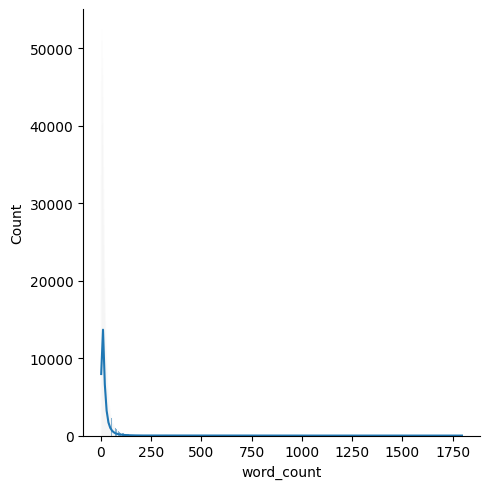

In [ ]:
sns.displot(df['word_count'], kde=True)

In [ ]:
df[df['word_count'] == 1796]

,VideoTitle,AuthorName,CommentText,Sentiment,CountryCode,CategoryID,VideoURL,word_count
691754,You don't have to be from Canada to vote for t...,@HOLYGRANDMASTERKNIGHTSTEMP-m9k,"worldsmastermasterofspriritsknightsofchrist,tm...",Negative,CA,25,https://www.youtube.com/watch?v=1j4-3ofDkio,1796


In [ ]:
df.columns

Index(['VideoTitle', 'AuthorName', 'CommentText', 'Sentiment', 'CountryCode',
       'CategoryID', 'VideoURL', 'word_count'],
      dtype='object')

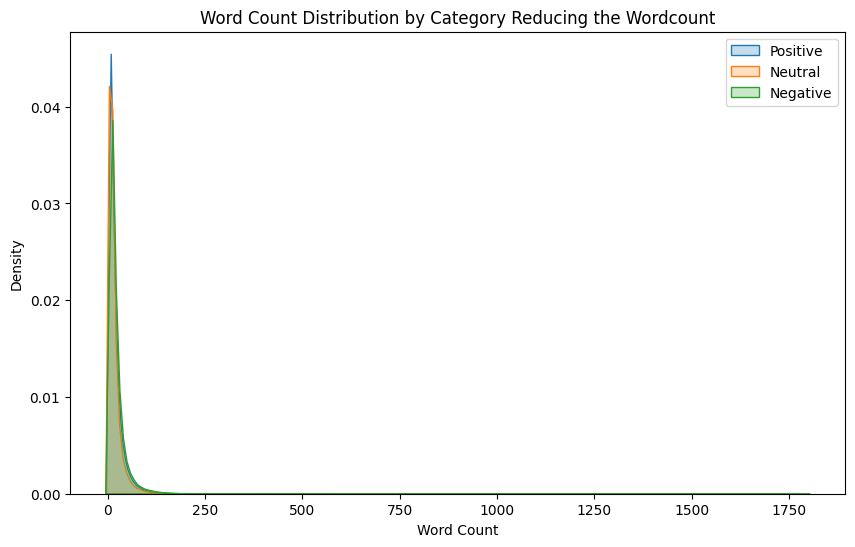

In [ ]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['Sentiment'] == 'Positive']['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['Sentiment'] == 'Neutral']['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['Sentiment'] == 'Negative']['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category Reducing the Wordcount')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
df1 = df[df['word_count'] < 500]

In [ ]:
import matplotlib.pyplot as plt

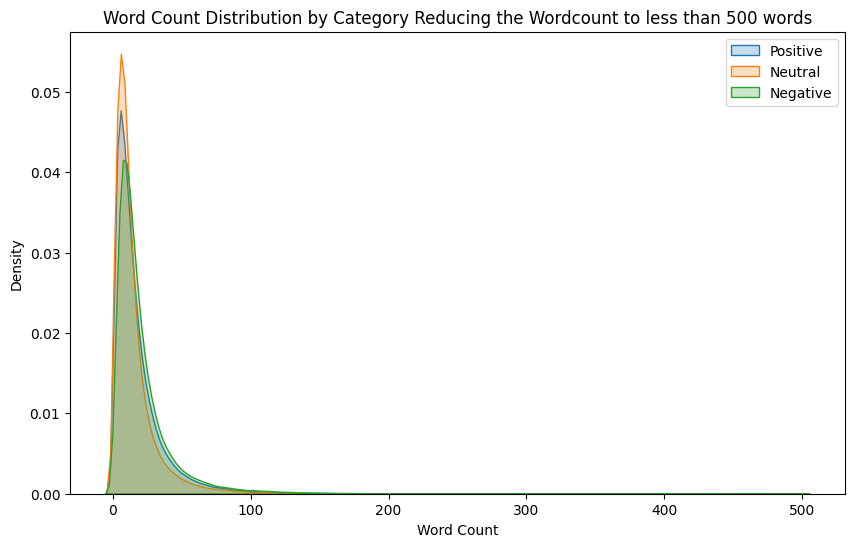

In [ ]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df1[df1['Sentiment'] == 'Positive']['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df1[df1['Sentiment'] == 'Neutral']['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df1[df1['Sentiment'] == 'Negative']['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category Reducing the Wordcount to less than 500 words')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: ylabel='word_count'>

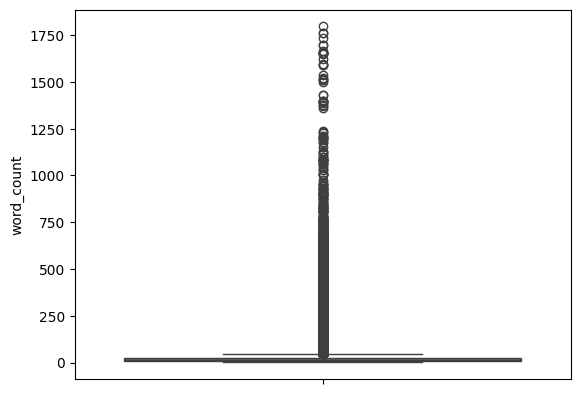

In [ ]:
sns.boxplot(df['word_count'])

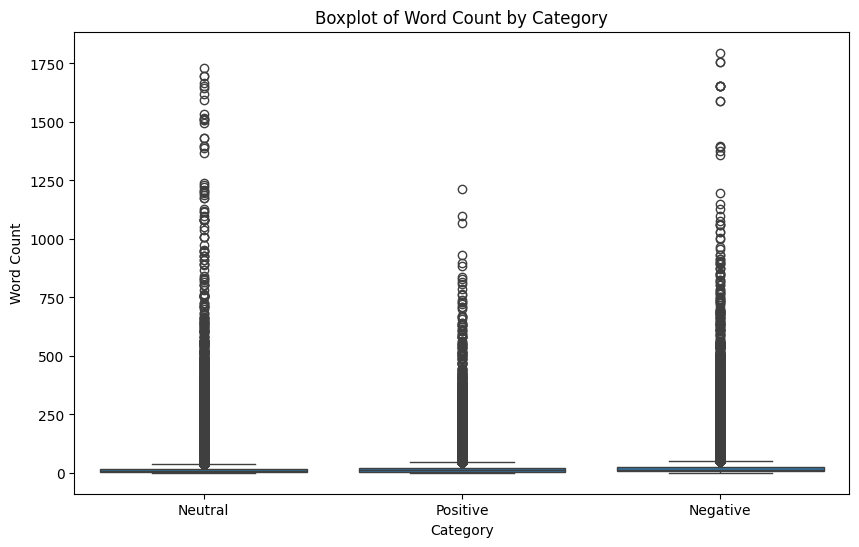

In [ ]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='Sentiment', ylabel='word_count'>

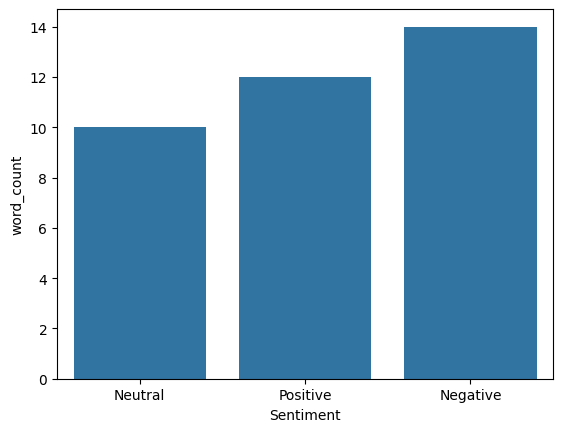

In [ ]:
sns.barplot(df,x='Sentiment',y='word_count',estimator='median')

#### url_pattern

In [ ]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

In [ ]:
df[(df['CommentText'].str.contains(url_pattern, regex=True))]

,VideoTitle,AuthorName,CommentText,Sentiment,CountryCode,CategoryID,VideoURL,word_count
1360,Toxic fume warning in Ukraine as oil depot hit...,@oneshot8329,https://www.youtube.com/watch?v=agtcdcgmnga li...,Neutral,GB,25,https://www.youtube.com/watch?v=j_zcR5Ay5JA,14
2619,Coronavirus infection closes UK medical centre...,AugmentedUser,https://panacea99.com/blogs/news/9-shocking-th...,Neutral,GB,25,https://www.youtube.com/watch?v=0Ngda6nsRoE,1
4027,Tens of thousands flee Colorado wildfires - BB...,@iwogajda5253,faustina kowalska and more: https...,Neutral,GB,25,https://www.youtube.com/watch?v=KmR_8EJYetE,5
8084,Ukraine War: Russia's Plan B is becoming clearer,AugmentedUser,https://youtu.be/nfngc_8rivc ukraine crisis no...,Neutral,GB,25,https://www.youtube.com/watch?v=1bxIlSvjIMQ,7
8479,Is London approaching lockdown?,AugmentedUser,https://youtu.be/iz13vfxezlk,Neutral,GB,25,https://www.youtube.com/watch?v=JgNw63zfpU0,1
...,...,...,...,...,...,...,...,...
1028701,$70 Leaf Blowers Saved the 12 Rotor From Dyno ...,@larzy37,you and mad mike would be a terrifying team up...,Neutral,NZ,2,https://www.youtube.com/watch?v=0FGpD_1HL20,11
1028935,Who has sent weapons to Ukraine?,@can5,how come no one even spell a single word about...,Positive,GB,25,https://www.youtube.com/watch?v=Do-buN3KSkU,29
1030479,Russia launches 'full-scale' invasion of Ukraine,@kerjenez,i wish good luck to the russian troops ! 💪 💪 💪...,Positive,GB,25,https://www.youtube.com/watch?v=iw6TsFdvC_Q,12
1030988,US sheds light on West’s new Russia strategy,@paniki_man2512,https://youtube.com/shorts/cisshi4mq8s?feature...,Neutral,US,25,https://www.youtube.com/watch?v=yl_Fc29n9_o,1


In [ ]:
# Identify comments containing URLs
df = df[~(df['CommentText'].str.contains(url_pattern, regex=True))]


In [ ]:
df.shape

(1030555, 8)

#### comments containing new line characters

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
# Identify comments containing new line characters
comments_with_newline = df[df['CommentText'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline['CommentText'].sample(4)

,CommentText
374612,just because he says it doesn't make it true\nbeware of the bufoons
557545,"when i try to go to lsapp.dev i get a message that ""lsapp.dev has a security policy called http strict transport security (hsts), which means that firefox can only connect to it securely. you can’t add an exception to visit this site.""\n\nhow do i fix this? i've tried different browsers."
218438,art❌\nfart✅
897087,democrats: liar rat\nrepublicans: 😞


In [ ]:
# Identify comments containing new line characters
comments_with_newline.shape

(85500, 8)

In [ ]:
# Remove new line characters from the 'clean_comment' column
df['CommentText'] = df['CommentText'].str.replace('\n', ' ', regex=True)

#### emoji convert
- Convert emojis to text (retain sentiment meaning)

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.2 MB/s eta 0:00:00


In [ ]:
df['CommentText'].sample(5)

,CommentText
252011,thank you so much for the video
642108,"and just like the jasper n.p. fires, these fires were started by arsonists."
930923,nicee
79053,guardian talking about indoctrination is the most ironic thing of all time
987228,"what an incredible explanation! thank you so much for making it so clear and concise! a heads-up for new learners like myself: this video is a bit outdated. github now designates the primary branch as ""main"" instead of ""master."" trying to execute these commands precisely as gwen does in the video will lead to errors. remember: main ✔️ master ❌"


In [ ]:
import emoji
import pandas as pd
from multiprocessing import Pool, cpu_count


# Convert emojis to text (e.g., 😂 → ":face_with_tears_of_joy:")
def convert_emoji(text):
    return emoji.demojize(text, delimiters=(" ", " "))  # Removes ":" for cleaner output

# Parallel processing (adjust chunksize based on RAM)
def parallel_emoji_conversion(df, column="CommentText"):
    with Pool(cpu_count()) as pool:
        results = pool.map(convert_emoji, df[column].astype(str), chunksize=1000)
    return results

# Apply to DataFrame (takes ~1 min for 1M comments)
df["CommentText"] = parallel_emoji_conversion(df)

In [ ]:
df['CommentText'].sample(5)

,CommentText
492242,18:00 steady on alex rolling_on_the_floor_laughing
98116,you've got me through some dark days lately. your journeys give me hope. big big love sister. i pray this year is easier on your heart red_heart
349370,the outnumbered just report the crimes way because the democrats party including the squad including president bilden and vice-president harris it's far-left democratic party so they are tearing down society with nothing but crimes way and the open borders with fentanyl drugs cross the border
860381,very helpful video mam thank you so much
541117,awkward 19:40


In [ ]:
import emoji
import pandas as pd
from multiprocessing import Pool, cpu_count


# Convert emojis to text (e.g., 😂 → ":face_with_tears_of_joy:")
def convert_emoji(text):
    return emoji.demojize(text, delimiters=(" ", " "))  # Removes ":" for cleaner output


text = 'this is so disturbing '
convert_emoji(text)

'this is so disturbing '

#### punctuation check

In [ ]:
df['CommentText'].sample(5)

,CommentText
331181,2:18:38
603970,a side-by-side comparison.
296143,es se aap smjh skte ho ki angrej kitne bde bewkoof hote hain...
996854,"the development is paid for once, and then only the raw material price is left; machines do the rest, so yes, that adds up. and the shipping costs aren't much more expensive than the production. congratulations to everyone who buys this completely overpriced garbage! ^^"
189687,"for a moment those driver tires had light under them, he’s very lucky."


In [ ]:
import re
from emoji import demojize

def clean_punctuation(text):
    # Step 1: Keep sentiment-critical punctuation
    kept_punct = r'[\'!?\-…]'  # Note: Include ellipsis (…) and hyphen (-)
    text = re.sub(fr'[^\w\s{kept_punct}]', '', text)  # Remove all except kept_punct + words/space

    # Step 2: Normalize repeated punctuation (e.g., "!!!" → "!")
    text = re.sub(r'(!|\?|\.){2,}', r'\1', text)  # Reduce "!!!" → "!", "??" → "?"

    # Step 3: Handle apostrophes (don't → dont vs. preserve contractions)
    text = re.sub(r'(\w)\'(\w)', r'\1\2', text)  # Optional: Merge contractions

    return text

# Example
comment = "OMG!!! This is... amazing?? Don't @ me #cool"
df['CommentText'] = df['CommentText'].apply(clean_punctuation)

In [ ]:
df.sample(4)

,VideoTitle,AuthorName,CommentText,Sentiment,CountryCode,CategoryID,VideoURL,word_count
584743,Paris Attacks: Three Days Of Terror,@Bruul619,islam will always do this,Negative,GB,25,https://www.youtube.com/watch?v=AnyZ_RIhjzY,5
957262,AMAZING NEWS! - @itsJudysLife,@janelleabisado,"omg… keira for fricking president. you guys have raised those girls so well! we are so proud of you keira! please continue to be the change we need in this world babygirl, you have such a bright future ahead of you. red_heart red_heart red_heart",Positive,CA,22,https://www.youtube.com/watch?v=04FbheWTgWU,42
692387,Squid Game 2 BEHIND the Scenes 🤯🎥,@mihomer,kelvin went god mode in that scene loudly_crying_face folded_hands,Positive,NZ,1,https://www.youtube.com/watch?v=DgxPIMI2m4E,7
166746,Anderson Cooper’s tribute to his friend Anthony Bourdain,@lizkim1546,2024 and still remember the man. i wonder if he ever went to el salvador to try our pupusas and the “ garrobo”,Neutral,US,25,https://www.youtube.com/watch?v=qF7SRQFd49E,23


In [ ]:
# import pandas as pd
# import re
# from collections import Counter

# def extract_punctuation(text):
#     # Regex to find all punctuation (unicode-aware)
#     return re.findall(r'[^\w\s]', str(text))

# # Apply to all comments and flatten the list
# all_punctuation = df['CommentText'].apply(extract_punctuation).sum()

In [ ]:
# punctuation_counts = Counter(all_punctuation)
# unique_punctuation = len(punctuation_counts)

# print(f"Total unique punctuation marks: {unique_punctuation}")
# print("Top 10 most common punctuation marks:")
# for char, count in punctuation_counts.most_common(10):
#     print(f"'{char}': {count} occurrences")

#### Handle numbers (remove or replace with )

In [ ]:
df['CommentText'].sample(4)

,CommentText
618771,dont copy candy.supestar
323847,that failed dunk killed me face_with_tears_of_joy face_with_tears_of_joy
1027614,wow nice car
80792,gorgeous sweater


In [ ]:
def smart_number_handling(text):
    # Keep percentages (e.g., 50%)
    text = re.sub(r'(\d+)%', r'<PERCENT>\1', text)
    # Keep ratings (e.g., 5/5)
    text = re.sub(r'(\d+)/\d+', r'<RATING>\1', text)
    # Replace other numbers
    text = re.sub(r'\d+', '<NUM>', text)
    return text

# Example
comment = "Rated 5/5 and 50% happy!"
df['CommentText']  = df['CommentText'].apply(smart_number_handling)

In [ ]:
df['CommentText']

,CommentText
0,anyone know what movie this is?
1,the fact theyre holding each other back while equally being most aggressive face_with_tears_of_joy face_with_tears_of_joy
2,waiting next video will be?
3,"thanks for the great video. i dont understand why the db continues to be accesible through port <NUM> when the local machine connects to the docker container through port <NUM>? or, why is it not possible to make get requests to port <NUM> on my local machine? is it just because the port <NUM> is only the port used to connect the app to the database, but the app itself is still handling http through <NUM>? so an incoming request hits <NUM>, then goes through <NUM> to get to the database?"
4,good person helping good people. this is how it is in america with the exception of ny and dc.
...,...
1032220,"any recommendations for how to build on top of this? add complexity, improve accuracy? am applying this lesson to my own project"
1032221,"act foolishly, receive foolish rewards."
1032222,i think many people would like to know the model of your black magic hardware!
1032223,caramel


#### lang detect (didn't worked)

In [ ]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313502 sha256=def949e482952c844978f3d35ece26fdb88cb251aab3d49ad9e8fcb73dc7fa11
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
# pip install numpy==1.24.4 --upgrade

In [ ]:
# import fasttext

# model = fasttext.load_model('/content/lid.176.bin')
# /content/lid.176.bin

In [ ]:
import fasttext

# Download the pretrained model first
model = fasttext.load_model('/content/lid.176.bin')

def detect_language_fasttext(text):
    text = str(text).replace('\n', ' ').replace('\r', ' ').strip()
    if text:
        try:
            predictions = model.predict(text, k=1)
            return predictions[0][0].replace('__label__', '')
        except:
            return 'unknown'
    else:
        return 'unknown'

ValueError: /content/lid.176.bin cannot be opened for loading!

In [ ]:
test_cases = [
    "Hello world",                   # English
    "Hola mundo",                    # Spanish
    "Привет мир",                    # Russian
    "This is a test with emoji 😂",  # With emoji
    "12345",                         # Numbers only
    "",                              # Empty
]

for text in test_cases:
    lang = detect_language_fasttext(text)
    print(f"Text: '{text}' → Language: {lang}")

In [ ]:
# Apply to your DataFrame
df['lang_detect'] = df['CommentText'].apply(detect_language_fasttext)

In [ ]:
df['lang_detect'].value_counts().head(12)

In [ ]:
df['lang_detect'].value_counts().head(1).index.to_list()

In [ ]:
df.shape

In [ ]:
df['lang_detect'].unique()

In [ ]:
languages_to_keep = df['lang_detect'].value_counts().head(12).index.to_list()

In [ ]:
df = df[df['lang_detect'].isin(df['lang_detect'].value_counts().head(1).index.to_list())]

In [ ]:
df.shape

##### Translate to a common language (English):

In [ ]:
# First install the working version
# !pip install googletrans==4.0.0-rc1

In [ ]:
!pip install deep-translator

In [ ]:
import numpy as np

In [ ]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
import time

# Initialize translator
translator = GoogleTranslator(source='auto', target='en')

# Language code mapping for special cases
LANGUAGE_MAPPING = {
    'tl': 'fil',  # Tagalog to Filipino
    'zh': 'zh-CN'  # Chinese to Simplified Chinese
}

def translate_to_english(text, lang):
    """Translate non-English text to English"""
    if lang == 'en':
        return text

    try:
        # Handle special language codes
        source_lang = LANGUAGE_MAPPING.get(lang, lang)

        # Add delay to avoid rate limiting (0.2 seconds between requests)
        time.sleep(0.2)

        # Translate
        translated = GoogleTranslator(source=source_lang, target='en').translate(str(text))
        return translated if translated else text
    except Exception as e:
        print(f"Error translating {lang} text: {str(e)}")
        return text  # Return original if translation fails

# Apply translation with progress bar
tqdm.pandas()
df['translated_text'] = df.progress_apply(
    lambda x: translate_to_english(x['CommentText'], x['lang_detect']),
    axis=1
)

# Verify results
print("\nTranslation sample:")
for lang in ['es', 'ru', 'tl', 'de']:  # Sample languages
    sample = df[df['lang_detect'] == lang].sample(1).iloc[0]
    print(f"\n{lang.upper()}: {sample['CommentText']}")
    print(f"→ EN: {sample['translated_text']}")

In [ ]:
df['translated_text']

### stopwords

In [ ]:
!pip install nltk

In [ ]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['CommentText'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


In [ ]:
df['num_stop_words'].describe()

In [ ]:
df.columns

In [ ]:
df[['CommentText', 'word_count', 'num_stop_words']].sample(10)

In [ ]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['Sentiment'] == 'Positive']['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['Sentiment'] == 'Neutral']['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['Sentiment'] == 'Negative']['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# median word counts among sentiments

sns.barplot(df,x='Sentiment',y='num_stop_words',estimator='median')

In [ ]:
# Create a frequency distribution of stop words in the CommentText column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['CommentText'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



### Sentiment col

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="Sentiment")

In [ ]:
# frequency distribution of sentiments

df['Sentiment'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sentiment', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

In [ ]:
df.shape

In [ ]:
df.iloc[2619]

### new col: num_chars

In [ ]:
df['num_chars'] = df['CommentText'].apply(len)

df.head()

In [ ]:
df['num_chars'].describe()

In [ ]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['CommentText'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)



In [ ]:
char_frequency_df['character'].values

In [ ]:
char_frequency_df['character'].value_counts(ascending=False)

### new col: num_punctuation_chars

In [ ]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['CommentText'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,VideoTitle,AuthorName,CommentText,Sentiment,CountryCode,CategoryID,VideoURL,word_count,num_stop_words,num_punctuation_chars
190174,A seal is parasitized by a clam and is asking ...,@수엔수-k1q,ai인가요 실화 영상 인가요 믿을 수가 있어야지,Neutral,NZ,15,https://www.youtube.com/watch?v=9_mpqdeOnio,7,0,0
825065,Mark Cuban Calmly Explains How Trump Is A Frau...,AugmentedUser,the harris/ballz campaign should create an ad ...,Neutral,US,25,https://www.youtube.com/watch?v=1poiUb_nkCo,10,4,1
42417,This Guy Is Completely Crazy 🤯,@ariannecastigador9372,😢😢😢😢,Neutral,US,26,https://www.youtube.com/watch?v=TloMiwQv1x4,1,0,0
454079,everyone thought the car was locked until…,AugmentedUser,that's not a fancy car; it's basically a garba...,Negative,CA,17,https://www.youtube.com/watch?v=p-Q_KPlyJwU,10,4,4
833609,McEnany blasts Biden admin for 'appalling lies...,@miguellomeli8709,they don’t intend to stay now is like when she...,Negative,CA,25,https://www.youtube.com/watch?v=PfGwj--X7SE,22,11,0


In [ ]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,1.028717e+06
mean,3.482210e+00
std,1.358229e+01
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,9.855000e+03


<Axes: xlabel='Sentiment', ylabel='num_punctuation_chars'>

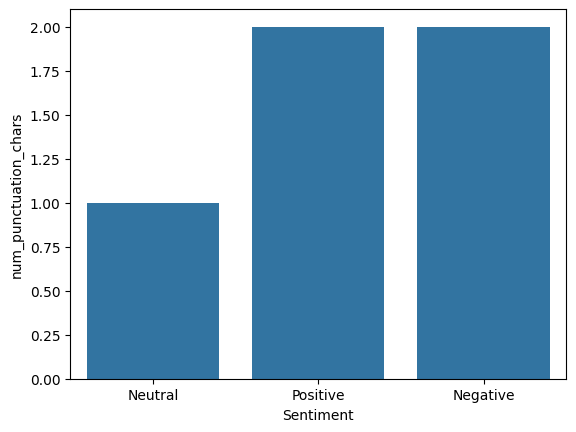

In [ ]:
sns.barplot(df, x='Sentiment', y='num_punctuation_chars', estimator='median')

### Most Frequent Bigram and Trigram

<ipython-input-57-6729faa5b990>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


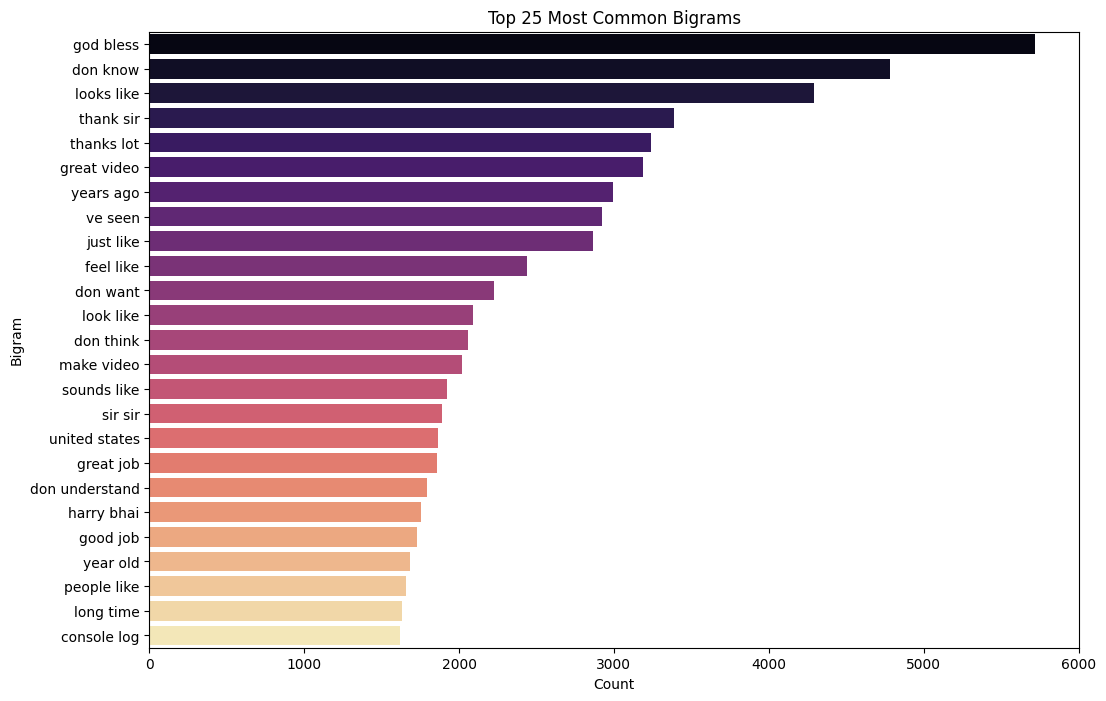

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['CommentText'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


<ipython-input-58-243cffddedb8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


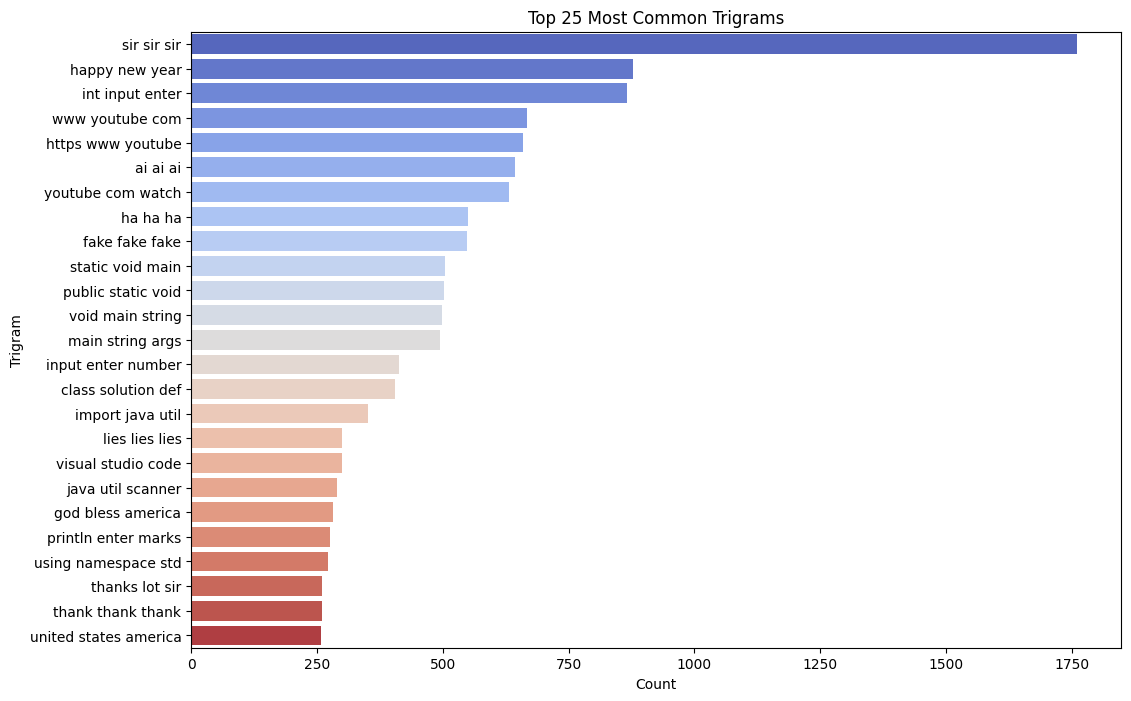

In [ ]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['CommentText'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['CommentText'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID,VideoURL,word_count,num_stop_words,num_chars,num_punctuation_chars,clean_comment
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1,https://www.youtube.com/watch?v=mcY4M9gjtsI,6,2,31,1,Anyone know what movie this is?
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17,https://www.youtube.com/watch?v=2vuXcw9SZbA,13,6,79,1,The fact they're holding each other back while...
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27,https://www.youtube.com/watch?v=papg2tsoFzg,5,1,27,1,waiting next video will be?
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27,https://www.youtube.com/watch?v=31KTdfRH6nY,91,43,488,9,Thanks for the great video. I don't understand...
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2,https://www.youtube.com/watch?v=-hV6aeyPHPA,19,9,94,2,Good person helping good people. This is how i...


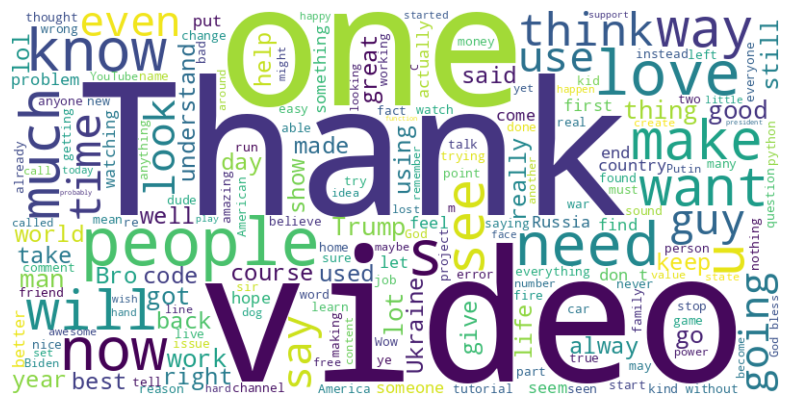

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['CommentText'])

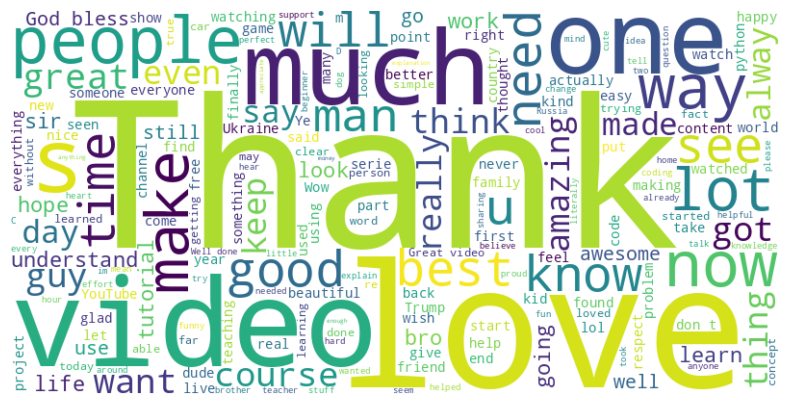

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['Sentiment'] == 'Positive']['CommentText'])

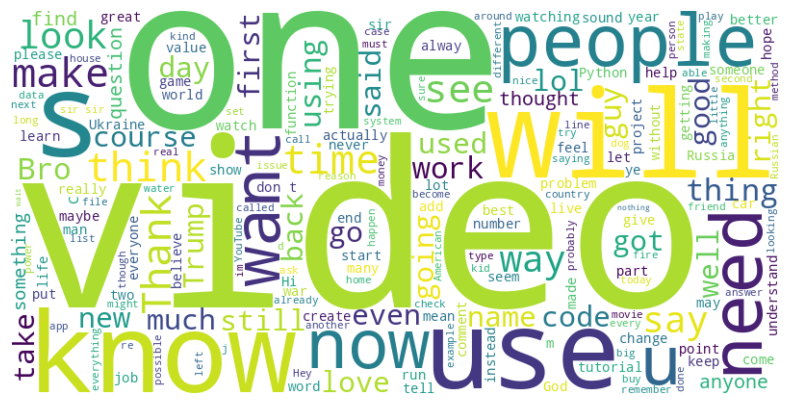

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['Sentiment'] == 'Neutral']['CommentText'])

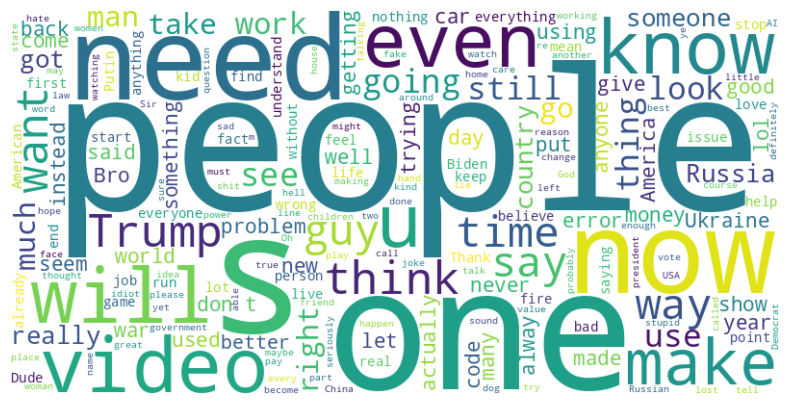

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['Sentiment'] == 'Negative']['CommentText'])

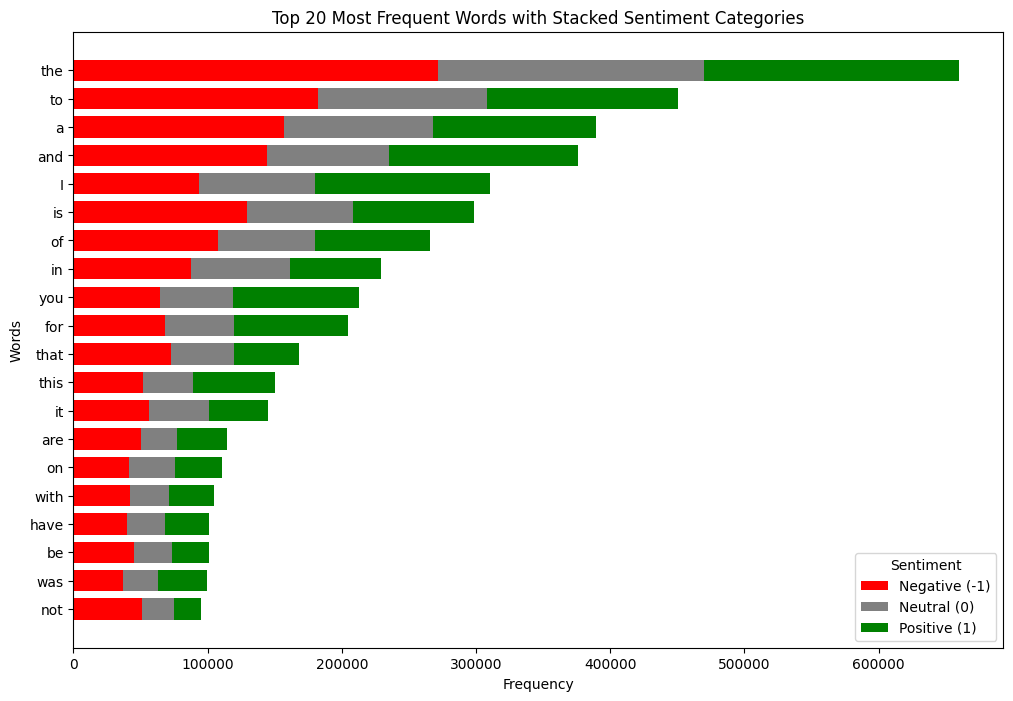

In [ ]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['CommentText'].split()
        category = row['Sentiment']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { 'Negative': 0, 'Neutral': 0, 'Positive': 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word]['Negative'] for word in top_words]
    neutral_counts = [word_category_counts[word]['Neutral'] for word in top_words]
    positive_counts = [word_category_counts[word]['Positive'] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)


### Save the Cleaned Excel File now

In [ ]:
df.shape

(963063, 11)

In [ ]:
import re

# Function to remove illegal Excel characters
def remove_illegal_excel_chars(text):
    if isinstance(text, str):
        return re.sub(r'[\x00-\x08\x0B-\x0C\x0E-\x1F]', '', text)
    return text

# Apply to all string columns in the DataFrame
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(remove_illegal_excel_chars)


In [ ]:
import pandas as pd

df.to_excel('youtube_comments_english.xlsx', index=False)

In [ ]:
df['CommentText'].sample(4)

,CommentText
109466,the word putamales sounded cool at first until i searched it up.
460157,i know an active nfl player who told me alabama offered him payment to play before it became legal. he ultimately chose florida.
292461,"in c++, it only calculates half of the equation correctly."
881420,"dont question anything, simply consume the product and get hyped for the next one!"


In [ ]:
### Pre-processing task